In [38]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return pd.DataFrame(data, columns=['length', 'loss'])

def process_data(data, bin_size=1000):
    # Define bins
    max_length = data['length'].max()
    bins = range(0, max_length + bin_size, bin_size)
    labels = [f"{i}-{i + bin_size - 1}" for i in bins[:-1]]

    # Bin data
    data['bin'] = pd.cut(data['length'], bins=bins, labels=labels, right=False)

    # Calculate statistics for loss
    stats_loss = data.groupby('bin')['loss'].agg(['mean', 'std'])

    # Calculate mean PPL
    data['ppl'] = np.exp(data['loss'])
    stats_ppl = data.groupby('bin')['ppl'].mean().rename('mean_ppl')

    # Combine results
    grouped = pd.concat([stats_loss, stats_ppl], axis=1).reset_index()
    return grouped

def plot_loss(all_grouped_data, model_names):
    plt.figure(figsize=(12, 6))
    for grouped_data, model_name in zip(all_grouped_data, model_names):
        plt.plot(grouped_data['bin'], grouped_data['mean'], label=model_name, marker='o', linestyle='-')  # Use a line plot
    plt.xlabel('Text Length')
    plt.ylabel('Average Loss')
    plt.title('Comparative Average Loss vs. Text Length')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def plot_ppl(all_grouped_data, model_names):
    plt.figure(figsize=(12, 6))
    for grouped_data, model_name in zip(all_grouped_data, model_names):
        plt.plot(grouped_data['bin'], grouped_data['mean_ppl'], label=model_name, marker='o')
    plt.xlabel('Text Length')
    plt.ylabel('Average Perplexity')
    plt.title('Comparative Average Perplexity vs. Text Length')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
def main():
    # List of filepaths to your JSON files
    versions = ['cc', 'cc_merged_v1', 'cc_merged_v2', 'cc_merged_v3']
    filepaths = [f'/home/aiops/zhuty/tinyllama/scripts/eval_ppl/results/tiny_LLaMA_1b_8k_{version}_8k_chunk_1000.json' for version in versions]
    model_names = ['random','dense','bm25','gen+bm25']

    plt.figure(figsize=(12, 8))

    all_grouped_data = []
    for filepath in filepaths:
        data = load_data(filepath)
        grouped_data = process_data(data)
        all_grouped_data.append(grouped_data)

    plot_loss(all_grouped_data, model_names)
    plot_ppl(all_grouped_data, model_names)

<Figure size 1200x800 with 0 Axes>

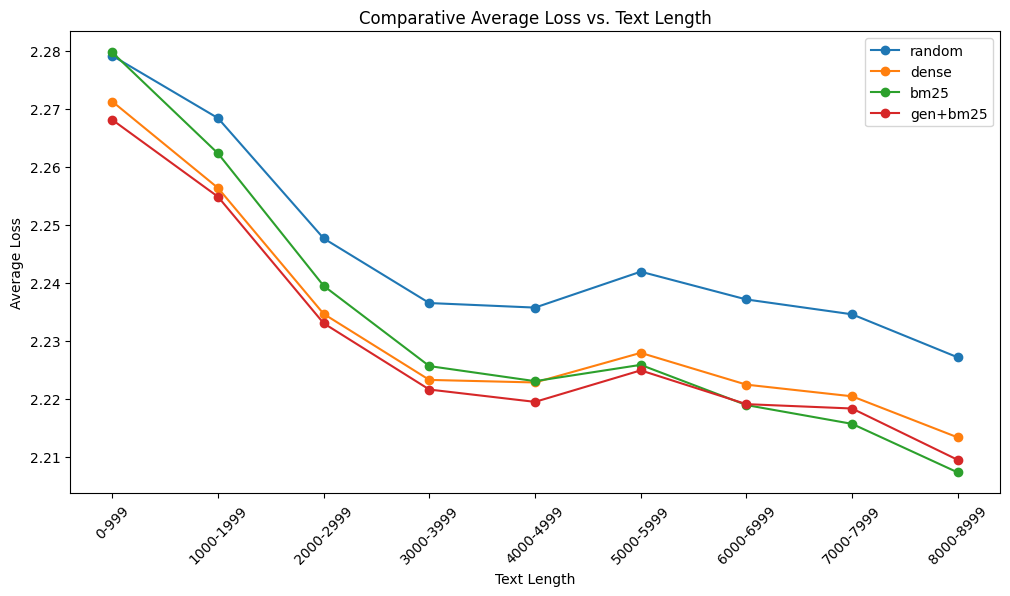

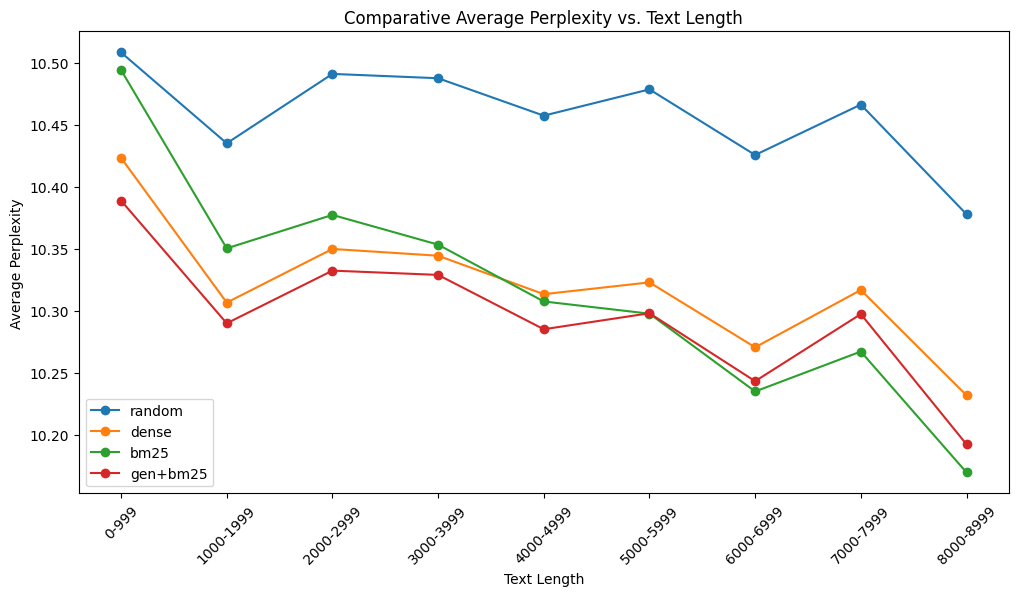

In [39]:
main()